# Web Crawler

Collect text data from the PTT forum, process the article texts, and finally create a word cloud for a quick overview of the topics in these collected texts.

## Crawling Data from PTT

In [1]:
import requests
from bs4 import BeautifulSoup as soup  # HTML data structure
from lxml import etree


# extract article hyperlinks from an index page
def extractArtLinks(url):
    r = requests.get(url, cookies={'over18': '1'})
    page_soup = soup(r.text, "html.parser")
    containers = page_soup.findAll("div", {"class": "r-ent"})
    art_links = []
    for container in containers:
        # Finds all link tags "a" from within the first div.
        art_link = container.find('a')
        if art_link:
            #print(art_link['href'])
            #print(container.find('div',{'class':'title'}).get_text())
            art_meta = container.find('div', {'class': 'meta'})
            #print(art_meta.find('div',{'class':'author'}).get_text())
            #print(art_meta.find('div',{'class':'date'}).get_text())

            art_links.append({
                'push':
                container.find('div', {
                    'class': 'nrec'
                }).get_text(),
                'title':
                container.find('div', {
                    'class': 'title'
                }).get_text().strip(),
                'date':
                art_meta.find('div', {
                    'class': 'date'
                }).get_text(),
                'author':
                art_meta.find('div', {
                    'class': 'author'
                }).get_text(),
                'link':
                art_link['href'],
                'text':
                extractArtText('https://www.ptt.cc' + art_link['href'])
            })

    return (art_links)


# find the previous index page link
def findPrevIndex(url):
    r = requests.get(url, cookies={'over18': '1'})
    page_soup = soup(r.text, "html.parser")
    btn = page_soup.select('div.btn-group > a')
    up_page_href = btn[3]['href']
    next_page_url = 'https://www.ptt.cc' + up_page_href
    return (next_page_url)


# extract article contents from  the article hyperlink
def extractArtText(url):
    r = requests.get(url, cookies={'over18': '1'})
    #page_soup = soup(r.text, "lxml")
    #print(page_soup.find("div",{"id":"main-content"}).get_text())
    #art_text=page_soup.select('div#main-content', limit=1)[0].text
    content = r.content.decode()
    html = etree.HTML(content)
    art_text = html.xpath(
        "//div[@id='main-content']/text()[not(self::div|self::span[@class='f2'])]"
    )
    return ''.join(list(art_text))

In [2]:
## Debug Use

# url = 'https://www.ptt.cc/bbs/Food/M.1602332821.A.6F3.html'
# r = requests.get(url, cookies={'over18': '1'})
# #page_soup = soup(r.text, "lxml")
# #print(page_soup.find("div",{"id":"main-content"}).get_text())
# #art_text=page_soup.select('div#main-content', limit=1)[0].text
# content = r.content.decode()
# html = etree.HTML(content)
# art_text = html.xpath(
#     "//div[@id='main-content']/text()[not(self::div|self::span[@class='f2'])]")

# print(''.join(list(art_text)))

```{note}
For CSS selector, don't know how to set conditional criteria to select only texts under div#main-container but not those included in the child div.article-metaline and span.f2.

So here I use the XPath, which requires the lxml package.
```

In [3]:
# main()
num_of_index_page = 5
board_name = 'Food'
url = 'https://www.ptt.cc/bbs/{}/index.html'.format(board_name)
all_links = []
for page in range(1, num_of_index_page):
    all_links = all_links + extractArtLinks(url)
    url = findPrevIndex(url)
len(all_links)

66

In [4]:
type(all_links[2])
print(all_links[2])

{'push': '', 'title': '[食記] 花蓮市區 沙通拾壹泰式料理', 'date': '11/06', 'author': 'shangyikuo', 'link': '/bbs/Food/M.1604626593.A.DAC.html', 'text': '\n\n\n   餐廳名稱：沙通拾壹泰式料理\n   消費時間：109年/11月\n   地址：花蓮縣花蓮市中美路83號2樓\n   電話：0988-527959\n   營業時間：中午11:30-14:00 晚間17:30-20:30(週一二公休)\n\n\n   網誌圖文版：\n\n\n沙通拾壹泰式料理位於美崙超美麵包樓上，是間近幾個月才新開幕的餐廳，如果不是朋友\n的推薦，經過都很難發現它的存在。走上二樓就能聽到店內響起了熟悉的泰文歌曲，而會\n取做沙通拾壹，我在猜想也是因為年輕老闆與老闆娘的相遇就是在曼谷沙通區的法國藍帶\n甜點學院呢？最後由泰國籍的闆娘將家鄉味帶到花蓮來看店。店面空間很大，然後桌與桌\n之間也保持著相當寬敞的距離，用餐起來還算滿舒服的。\n\n\n店內泰式品項其實並不算多，飯食除了打拋豬、泰式烘蛋與烤豬肉套餐之外，就多以麵食\n類與湯品居多，然後價位在花蓮來看屬於中間偏高的。而菜單有照片輔助，方便初次用餐\n的人能更快決定，這點是我認為滿加分的部分。\n\n\n**泰式打拋豬肉飯\n打拋豬與外面吃起來的感覺有些許不同，是拌炒到很入味但卻又不會油膩的那種。然後要\n特別強調的是，上頭所看到的葉子並不是九層塔喔，而是使用正宗打拋葉下去提味的，與\n粒粒分明又有咬勁的長香米搭配還滿好吃的。不過因為不管打拋還是白飯都是鋪平上桌的\n狀態，因此涼掉的時間會比較快一些，只好以速戰速決來避免了。而泰式奶茶是我喜歡屬\n於茶葉味道比較濃烈的那種，老闆自動去冰後雖然還是微甜，但卻不會膩口不錯喝。\n\n\n**泰式香豬肉套餐\n烤豬肉的調味與香料上實在處理到非常透徹，然後又加上其本身豬肉咬勁與帶點香氣的油\n脂，沾魚露後配著糯米飯吃不知不覺就完食了。不過比較可惜的是糯米飯裝在盒子裡變成\n了一坨，需要用手直接暴力分開並撕成小塊食用，不然會有點硬，吃到下巴很酸。總結來\n說雖然餐點選擇和價位上都不算佔到優勢，但仍是想嘗鮮東南亞等異國料理時的不錯選擇\n。\n\n--\n\n/郭郭的花東走

In [5]:
print('Push: {push:s} \n'
      'title: {title:s} \n'
      'date: {date:s} \n'
      'author: {author:s} \n'
      'link: {link:s} \n'
      'text: {text:.20} \n'.format(**all_links[3]))

Push:  
title: [公告] Food板 板規 V3.91 
date: 12/16 
author: Dilbert 
link: /bbs/Food/M.1355673582.A.5F7.html 
text: 
                    



## Text Normalization

In [6]:
import sys
sys.path.insert(1, '../nlp')
import text_normalizer_zh as tn

In [7]:
print(all_links[3]['text'])


                    
                                                          2017.6.4修訂


1.置入水桶禁言期滿，將由系統自動解除限制，若到期而未解禁請寫信詢問板主。

2.文章被刪除者，若欲了解刪文原因或尋回備份，請洽精華區的資源回收桶。








             






    ：Chat82gether板、e-Shopping板
    ：Instant_Food 即時食物板
    ：fastfood 速食板
    ：CVS 便利商店板、hypermall 大賣場板
    ：Snacks板、Sweet板
    ：Drinks板

    張貼第1條各項所列之文章，除原文刪除，視情況可併處。


註：若對板規1之(1)涵攝範圍不夠清楚，請參閱精華區 和 
    有兩篇更詳細的補充說明。





  ，
    但需配合下列事項：
    

    未配合上述規定之店家廣宣，初犯，劣退＋水桶禁言60天；
    累犯，劣退＋終身水桶。推文違規廣宣者，終身水桶。



  Food板目前有限度的開放廣宣只接受兩種形式：

  

  網路行銷、廣告公司或第三方(如銀行、網站)與餐廳合辦的間接合作活動不予開放。




  接受餐廳招待試吃者，張貼食記必須誠實揭露，並以為標題，勿自創標題。
    與『』有關的廣宣，不分張貼者為，
    須一併計入廣宣額度限制－
    比照廣宣規定辦理，但團購服務缺失抱怨文則不受限制。

    欲張貼試吃廣宣者，請自行查詢板上是否已有未期滿的同店廣宣，
    若已有則不得張貼。違反上述規定者，刪除試吃食記，。
    累犯者，；，
    原受處分ID與分身ID處分。

註：1.精華區 對本板可接受的試吃種類有進一步說明，歡迎參閱。

    2.『』張貼限制期間，係指可開放新一篇廣宣。
      例：某餐廳於在板上有廣宣下次可貼廣宣時間：。
                  在板上有廣宣下次可貼廣宣時間：。
      特例：      在板上有廣宣下次可貼廣宣時間：。(因9月無31日)
                  間張貼的廣宣，統一於開放張貼下一篇廣宣。

    3.『』定義，以同

In [8]:
raw = [art['text'] for art in all_links if len(art) != 0 and len is not None]
raw_normalized = tn.normalize_corpus(raw)

Building prefix dict from /Users/Alvin/GoogleDrive/_MySyncDrive/RepositoryData/data/jiaba/dict.txt.jiebatw.txt ...


Loading model from cache /var/folders/n7/ltpzwx813c599nfxfb94s_640000gn/T/jieba.u1b52b47246a0f2e6497af6bbe107adac.cache


Loading model cost 0.608 seconds.


Prefix dict has been built successfully.


In [9]:
import pandas as pd

corpus_df = pd.DataFrame({"raw": raw, "normalized": raw_normalized})

In [10]:
corpus_df.head(2)

,raw,normalized
0,\n 餐廳名稱：早晨小姐 Good morning\n 消費時間：2020年/10月...,餐廳 名稱 早晨 小姐 消費 時間 年 月 地址 嘉義市 西區 延平街 號 電話 營業 時間...
1,\n\n\n西餐廳\n\n\n\n台北 新北\n\n\n\n新台幣$ 3000元\n\n\n...,西餐廳 台北 新北 新台幣 元 午餐 平日 人 台北 已經 吃過 美福 歐華 等 比較 希望...


In [11]:
raw[5]

'\n◆投票結果:(共有 220 人投票,每人最多可投 1 票)\n    選    項                                   總票數  得票率  得票分布\n    刪文後於板面註記(原制度)                    88 票  40.00%   40.00%\n  \n\n 投票結果已確定，未來板面刪文後處置措施將使用下列方案：\n\n \n\n 作法：\n   1.精華區內設置資源回收桶，子目錄則為各類刪文理由，\n     板面上的違規文章遭刪除後將置入資源回收桶內各子目錄。\n\n   2.板面配套措施：屆時被刪除的文章標題，將由板主手動改為全無內容\n     的空洞，以與板友自刪的文章作區隔。\n\n   3.由於板面註記將改為空洞，故未來板主不再提供精華區路徑指引服務。\n\n   4.欲確認刪除者為哪一位板主，請檢視該文章的編選者便可得知。\n\n編號    標      題                                  編    選      日    期\n  1. ◇ [請益] 請問高雄哪裡有不錯的合菜餐廳呢       bluefish     [09/17/05]\n  2. ◇ 請問一下-台北市哪裡有好吃的壓（捷運附近or23 Dilbert      [09/18/05]\n\n\n\n───────────────────────────────────────\n\n  1.首先感謝許多板友們的鼓勵，在這個管理環境越趨艱難的當下，\n    諸位的鼓勵對於越來越常覺得電池快乾掉的板主們是相當受用的，\n    無法一一回覆，僅以此圖聊表管理現況與心中謝意。XD\n\n    \n\n  2.\n\n    \n\n    \n\n    \n\n    大板易生紛爭，所以其實還在使用板面刪文註記的時代，板主便已經開始將\n    板面上的刪文放在精華區的隱藏目錄中以為存證，現在只是多了一個將其放\n    入依刪文理由分門別類的子目錄的動作並公開之，把板面註記和幫忙指引精\n    華區的時間省下來挪去做這件事，其實還OK啦～\n\n    未來如果可以順利徵得第三位專司執法的板主，應該就更是勝任愉快了。\n\n  3.\n\n    \n\n    目前暫時無此打算

In [12]:
raw_normalized[4]

'由於 有多位 版友 在 版 上 屢次 提到 標題 未 附上 地點 在 閱讀 搜尋 上常 造成 不便 在 此 懇請 各位 熱心 發表 文章 分享 資訊 的 版友 範例 食記 新竹 竹北 牛肉麵 真是 太令 人 銷魂 了 情報 台北 東區 屋 又 爆炸 了 作者 可 按大寫 修正 另外 也 範例 餐廳 名稱 地址 電話 營業 時間 價位 範圍 每人 請 各位 大大 發表 文章 時 盡量 幫忙 填寫 對版友 來 說 詳細 的 資料 會 更 方便 按圖索驥 對版僕 來 說 也 能 更 提高 收錄 文章 的 效率 請 大家 高抬貴手 多多 幫忙 以上 為 暫行 版規 大家 如有 修正 意見 請 推文 支持 或 來信 指教 謝謝 大家 版僕'

- [Unicode List](https://en.wikipedia.org/wiki/List_of_Unicode_characters)
- [Unicode Categories](https://unicodebook.readthedocs.io/unicode.html)

In [13]:
text = raw[0]
text

'\n   餐廳名稱：早晨小姐 Good morning\n   消費時間：2020年/10月\n   地址：嘉義市西區延平街 198 號\n   電話：05 222 3839\n   營業時間：07:00 – 13:30\n   每人平均價位：100~350\n   可否刷卡：否\n   有無包廂：無\n   推薦菜色：和風飯糰朝食\n\n＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝\n\n圖文版：\n\n＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝\n\n聽到可愛的名字「早晨小姐 Good morning 」，原本以為會是一間西式清新的網美早午餐店，但來到了嘉義延平街上找，才發現它原來是一間老宅樣貌的日式早午餐店。手作麵包、飯糰、日式定食、不定期推出的特色餐點，讓人每次來都可以品嘗到不一樣的口味。除了早晨小姐的早午餐外，還推出健康便當「元樂庵」，用餐時間很多人都會特地來外帶，也有 Ubereats 在外送。\n老老的房子，用木質系的日式風格重新裝潢過，暖簾上印著「早晨小姐」及「元樂庵」的字樣，門口掛滿了蕨類植物，讓我想起了在台南安南區的小鹿家麵包店，滿是蕨類植物的空間令人印象超級深刻。\n\n兩層樓的建築，一樓重新改建，二樓則是保有原本的建築特色，鐵花窗，充滿懷舊感。\n牆上的小黑板上，寫著是菜單上沒有的餐點，餐點種類多樣豐富。明太子櫛瓜燒、酒蒸蛤蜊、玉子燒、味噌湯泡飯、野菜天婦羅、鹽烤日本山藥等等，另外還有「元樂手作便當」，提供無謂素、少油少鹽的健康便當可以外帶外送。\n門口旁邊的小黑板上則是每日定食，這天的定食有龍田炸雞、鹽麴烤肉、酥炸柳葉魚及酥炸豚菲力，一份的價格為 $270，因為是現點現做，所以約莫要等 15 ~ 20 分鐘的時間喔。\n早晨小姐另一個強項就是自家的手作麵包，法國長棍、手作貝果、法式可頌、墨魚軟法...等，強調無添加香料、防腐劑，皆採用進口奶油。也有不少人來到早晨小姐不是用餐，也不是外帶便當，而是為了他們家的麵包而來的。\n\n早晨小姐的菜單提供輕食、沙拉、抹醬類吐司、三明治、置物、定時、飲品、氣泡飲、illy Coffee 及牛奶類，餐點種類多樣，麵包想吃、飯糰也想吃，讓人點餐時，想了好一會兒才決定要吃什麼。\n\n和風飯糰朝食 $150 + 季節酪梨 $30 + 里肌肉 $20\n豐盛的和風飯糰朝食，兩顆五穀飯糰，一個

In [14]:
import unicodedata

result = ''.join(ch for ch in text
                 if unicodedata.category(ch)[0] not in ['P', 'S'])
result

'\n   餐廳名稱早晨小姐 Good morning\n   消費時間2020年10月\n   地址嘉義市西區延平街 198 號\n   電話05 222 3839\n   營業時間0700  1330\n   每人平均價位100350\n   可否刷卡否\n   有無包廂無\n   推薦菜色和風飯糰朝食\n\n\n\n圖文版\n\n\n\n聽到可愛的名字早晨小姐 Good morning 原本以為會是一間西式清新的網美早午餐店但來到了嘉義延平街上找才發現它原來是一間老宅樣貌的日式早午餐店手作麵包飯糰日式定食不定期推出的特色餐點讓人每次來都可以品嘗到不一樣的口味除了早晨小姐的早午餐外還推出健康便當元樂庵用餐時間很多人都會特地來外帶也有 Ubereats 在外送\n老老的房子用木質系的日式風格重新裝潢過暖簾上印著早晨小姐及元樂庵的字樣門口掛滿了蕨類植物讓我想起了在台南安南區的小鹿家麵包店滿是蕨類植物的空間令人印象超級深刻\n\n兩層樓的建築一樓重新改建二樓則是保有原本的建築特色鐵花窗充滿懷舊感\n牆上的小黑板上寫著是菜單上沒有的餐點餐點種類多樣豐富明太子櫛瓜燒酒蒸蛤蜊玉子燒味噌湯泡飯野菜天婦羅鹽烤日本山藥等等另外還有元樂手作便當提供無謂素少油少鹽的健康便當可以外帶外送\n門口旁邊的小黑板上則是每日定食這天的定食有龍田炸雞鹽麴烤肉酥炸柳葉魚及酥炸豚菲力一份的價格為 270因為是現點現做所以約莫要等 15  20 分鐘的時間喔\n早晨小姐另一個強項就是自家的手作麵包法國長棍手作貝果法式可頌墨魚軟法等強調無添加香料防腐劑皆採用進口奶油也有不少人來到早晨小姐不是用餐也不是外帶便當而是為了他們家的麵包而來的\n\n早晨小姐的菜單提供輕食沙拉抹醬類吐司三明治置物定時飲品氣泡飲illy Coffee 及牛奶類餐點種類多樣麵包想吃飯糰也想吃讓人點餐時想了好一會兒才決定要吃什麼\n\n和風飯糰朝食 150  季節酪梨 30  里肌肉 20\n豐盛的和風飯糰朝食兩顆五穀飯糰一個搭配培根一顆搭配海苔醬還有一塊歐式麵包抹蔓越莓醬不用擔心吃不飽餐盤上的配菜種類多元豐富生菜沙拉小番茄杏鮑菇秋葵玉子燒地瓜等等當季蔬菜另外加了片里肌肉跟酪梨滿滿的天然食材沒有過多調味吃起來相當清爽最後還可以吃一小盅優格促進消化這麼豐盛滿足的一餐早午餐吃一份超級超級滿足\n好喜歡酪梨跟食材一起吃入口即化的豐厚口感Ｄ\

## Word Cloud

In [15]:
from collections import Counter
import imageio
from nltk.tokenize import WhitespaceTokenizer
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import pyplot as plt

In [16]:
## Check font paths
## !fc-list :lang=zh

ws = WhitespaceTokenizer()

tokens = [ws.tokenize(text) for text in raw_normalized]

In [17]:
from collections import Counter

# corpus token freq
tokens_freq = Counter(sum(tokens, []))
sorted(tokens_freq.items(), key=lambda x: x[1], reverse=True)

# corpus token freq per document
tokens_freq_per_doc = [Counter(wt) for wt in tokens]

# corpus token docfreq
tokens_df = Counter()

# map(tokens_df.update, (tfpd.keys() for tfpd in tokens_freq_per_doc))

for tfpd in tokens_freq_per_doc:
    tokens_df.update(tfpd.keys())

print(tokens_df)

Counter({'的': 66, '時間': 64, '有': 64, '是': 60, '在': 60, '餐廳': 58, '地址': 58, '號': 57, '了': 57, '電話': 56, '營業': 56, '也': 56, '消費': 55, '都': 55, '很': 55, '名稱': 53, '不': 52, '吃': 52, '就': 51, '可以': 48, '我': 48, '人': 47, '年': 45, '會': 45, '來': 45, '圖文': 44, '月': 43, '價位': 43, '但': 43, '版': 42, '好吃': 40, '說': 40, '好': 39, '每人': 38, '沒有': 38, '要': 38, '不過': 38, '上': 37, '到': 37, '因為': 36, '比較': 36, '平均': 34, '推薦': 34, '菜單': 34, '不錯': 34, '想': 33, '跟': 33, '味道': 33, '再': 33, '就是': 32, '喜歡': 32, '口感': 32, '元': 31, '覺得': 31, '無': 30, '小': 30, '去': 30, '還': 29, '網誌': 29, '看': 29, '又': 29, '一': 29, '價格': 28, '以': 28, '他': 28, '多': 28, '沒': 28, '我們': 28, '這': 28, '有無': 27, '讓': 27, '所以': 27, '如果': 27, '與': 27, '大': 27, '雖然': 27, '和': 27, '真的': 27, '得': 27, '包廂': 26, '一點': 26, '才': 25, '口味': 25, '用餐': 25, '很多': 25, '還有': 25, '時': 25, '選擇': 25, '不會': 25, '還是': 25, '或': 25, '店家': 25, '可否': 24, '刷卡': 24, '菜色': 24, '等': 24, '感覺': 24, '搭配': 23, '吃起來': 23, '其': 23, '著': 23, '餐點': 22, '除了': 22, '其實': 22, '有

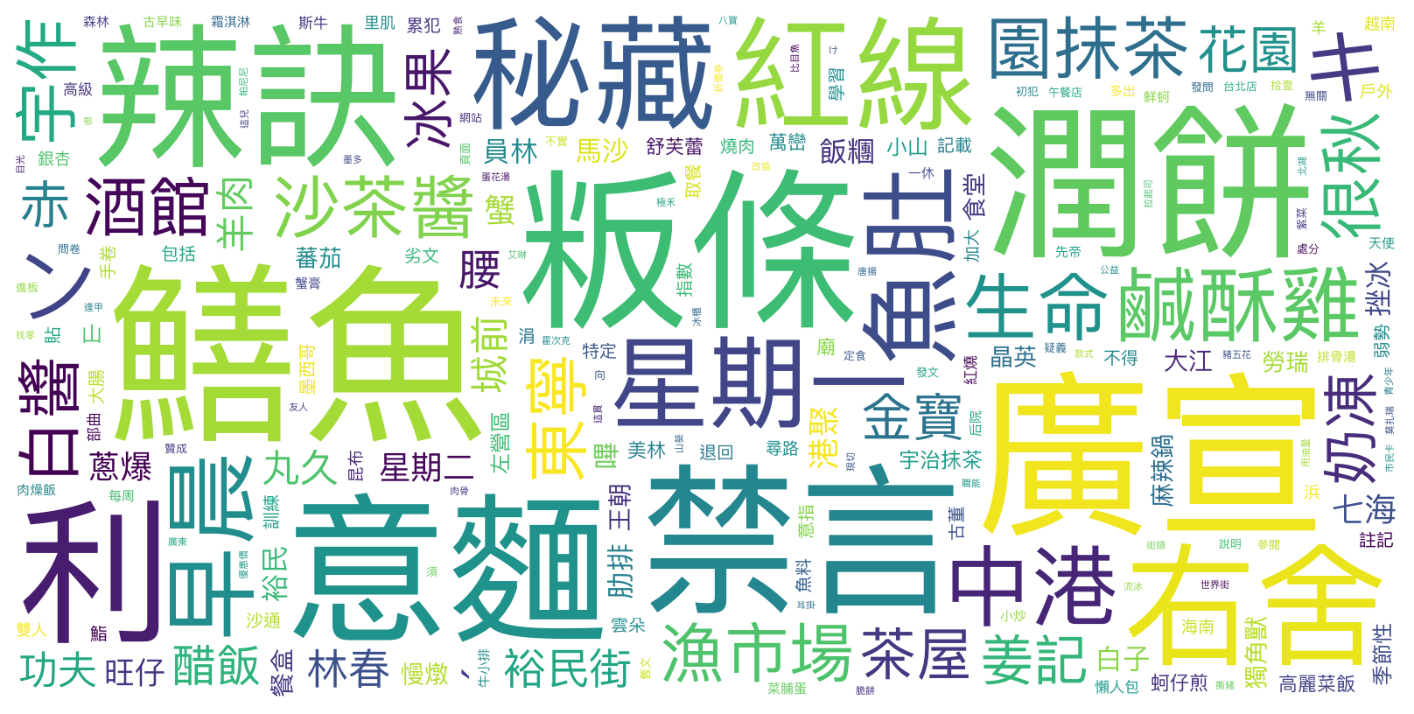

In [18]:
## Load stopwords
with open(
        '../../../RepositoryData/data/stopwords/tomlinNTUB-chinese-stopwords.txt'
) as f:
    stopwords = [w.strip() for w in f.readlines()]

# Create stopwords ad hoc
stopwords = set([
    '文章', '食記', '水桶', '刪除', '投票', '刪文', '連結', '板面', '板主', '規定', '違規', '使用',
    '所以', '禁止', '天', '票'
])

# Cutoff based on docfreq and stopwords
words2plot = dict([(w, tokens_freq[w]) for w, df in tokens_df.items()
                   if df < 2 and w not in stopwords and tokens_freq[w] >= 2])

wordcloud = WordCloud(font_path="/System/Library/Fonts/PingFang.ttc",
                      background_color='white',
                      stopwords=stopwords,
                      width=1600,
                      height=800,
                      margin=20)
# wordcloud.generate(' '.join([w for w in tokens_unnest if w not in stopwords]))
wordcloud.generate_from_frequencies(words2plot)
plt.figure(figsize=(20, 10), facecolor='w')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=1)
plt.show()
#plt.savefig('../data/twp-wordcloud2.png', facecolor='k', bbox_inches='tight')

:::{admonition} Exercise
How to seperate post texts from push texts?
:::
